In [1]:
import mnist_reader 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from skimage import io




import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_moons

import h5py
import imageio
from PIL import Image 
from utils import * # image processing functions from utils.py

2022-12-05 17:16:40.030756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(Xtrain, Ytrain), (Xtest, Ytest) = fashion_mnist.load_data()


# Ytrain = to_categorical(Ytrain, num_classes=10)

# Ytest = to_categorical(Ytest, num_classes=10)


In [3]:
#scaling training data set 


Xtrain_shaped = Xtrain.reshape(Xtrain.shape[0], -1)
Xtest_shaped = Xtest.reshape(Xtest.shape[0], -1)

Xtrain_std = Xtrain_shaped/ 255
Xtest_std= Xtest_shaped / 255

Xtrain_std = Xtrain_std[:10000]
Ytrain = Ytrain[:10000]

# Xmean = Xtrain.mean(axis=0)
# # Substract means
# Xtrn_nm = Xtrain - Xmean
# Xtst_nm = Xtest - Xmean
#reshapedXtrain = Xtrn_nm.reshape(60000, 784)


In [ ]:
def nnclassifier(hidden_layer_sizes,
                    activation,
                    solver,
                    alpha,
                    learning_rate_init,
                    max_iter,
                    n_iter_no_change,
                    random_state):
    
    nn_clf = MLPClassifier(hidden_layer_sizes,
                    activation,
                    solver,
                    alpha,
                    learning_rate_init,
                    max_iter,
                    n_iter_no_change,
                    random_state)
    
    nn_clf.fit(Xtrain_std, Ytrain)
    
    return nn_clf
    
    
    

In [4]:

logreg = LogisticRegression(max_iter=500)
logreg.fit(Xtrain_std, Ytrain)
print('Training accuracy: ', round(logreg.score(Xtrain_std, Ytrain),2))
print('Testing accuracy: ', round(logreg.score(Xtest_std,Ytest ),2))


Training accuracy:  0.93
Testing accuracy:  0.83


/Users/nikilchandrasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[learning_curve] Training set sizes: [ 750 2437 4125 5812 7500]


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  2.7min finished


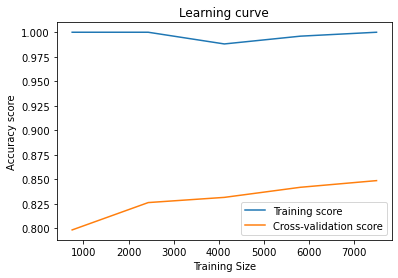

In [5]:
nn_clf = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1)
nn_clf.fit(Xtrain_std, Ytrain)


train_sizes, train_scores, val_scores = learning_curve(nn_clf, Xtrain_std, Ytrain, cv=4, scoring='accuracy', n_jobs=3,verbose=1)


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()
           
#print(nn_clf.score(Xtrain_std, Ytrain))



# fig, ax = plt.subplots(figsize=(6,4))
# ax.plot(nn_clf.loss_curve_)
# ax.set_xlabel('Number of iterations')
# ax.set_ylabel('Loss')


In [ ]:
alphas = np.logspace(-3, -0, 100)
learning_rates = np.logspace(-4, -2, 100)
parameters = {'learning_rate_init':learning_rates, 'alpha':alphas}



clf = RandomizedSearchCV(nn_clf, parameters, scoring='accuracy', n_iter=10, cv=3, verbose=2, n_jobs=1)

clf.fit(Xtrain_std, Ytrain)
clf.best_params_



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END alpha=0.008697490026177835, learning_rate_init=0.007924828983539177; total time=  17.8s
[CV] END alpha=0.008697490026177835, learning_rate_init=0.007924828983539177; total time=   9.7s
[CV] END alpha=0.008697490026177835, learning_rate_init=0.007924828983539177; total time=  17.0s


/Users/nikilchandrasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.005336699231206312, learning_rate_init=0.0001; total time= 2.0min


/Users/nikilchandrasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.005336699231206312, learning_rate_init=0.0001; total time= 1.9min
